# Census Income Example
This is a Keras example of classification problem. To simplify the data preparation part I used the Census problem from the Sci-Kit Learn class.

The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

# Install tensorflow
If necessary uncomment one of the lines below

In [ ]:
# For tensorflow with CPU support only
#!pip install tensorflow
# For GPU version of tensorflow
#!pip install tensorflow-gpu

# Imports

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [ ]:
df = pd.read_csv("https://github.com/PrzemekSekula/DeepLearningClasses1/raw/master/data/census.csv")

# Data preparation
### Selecting columns
Personaly I decided to delete the following columns:
- education - we have education-num, this is enough
- marital status - too many classes
- relationship - I am not sure if it is useful, and there are many classes
- race - I am not sure if it is useful
- native-country - too many classes

**I deleted many columns just to make the task easier to read. Students are encouraged to experiment with the columns and check if they can improve the results.**


In [ ]:
df = df[['age', 'workclass', 'education-num', 'occupation', 
         'sex', 'hours-per-week', 'income']]

df.head()

,age,workclass,education-num,occupation,sex,hours-per-week,income
0,39,State-gov,13,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,<=50K
2,38,Private,9,Handlers-cleaners,Male,40,<=50K
3,53,Private,7,Handlers-cleaners,Male,40,<=50K
4,28,Private,13,Prof-specialty,Female,40,<=50K


### Data preprocessing

#### First step - change the labels into binary values.

In [ ]:
df = pd.get_dummies(df, columns=['income'], drop_first=True)
df.head(10)

,age,workclass,education-num,occupation,sex,hours-per-week,income_>50K
0,39,State-gov,13,Adm-clerical,Male,40,0
1,50,Self-emp-not-inc,13,Exec-managerial,Male,13,0
2,38,Private,9,Handlers-cleaners,Male,40,0
3,53,Private,7,Handlers-cleaners,Male,40,0
4,28,Private,13,Prof-specialty,Female,40,0
5,37,Private,14,Exec-managerial,Female,40,0
6,49,Private,5,Other-service,Female,16,0
7,52,Self-emp-not-inc,9,Exec-managerial,Male,45,1
8,31,Private,14,Prof-specialty,Female,50,1
9,42,Private,13,Exec-managerial,Male,40,1


#### Second step - change the `sex` column into binary values

In [ ]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head(10)

,age,workclass,education-num,occupation,hours-per-week,income_>50K,sex_Male
0,39,State-gov,13,Adm-clerical,40,0,1
1,50,Self-emp-not-inc,13,Exec-managerial,13,0,1
2,38,Private,9,Handlers-cleaners,40,0,1
3,53,Private,7,Handlers-cleaners,40,0,1
4,28,Private,13,Prof-specialty,40,0,0
5,37,Private,14,Exec-managerial,40,0,0
6,49,Private,5,Other-service,16,0,0
7,52,Self-emp-not-inc,9,Exec-managerial,45,1,1
8,31,Private,14,Prof-specialty,50,1,0
9,42,Private,13,Exec-managerial,40,1,1


#### Third step - replace rare classes

Let's check if we have any rare classes

In [ ]:
print(df.value_counts('workclass'))

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64


In [ ]:
df.workclass = df.workclass.replace({'Without-pay':'?'})
df.workclass = df.workclass.replace({'Never-worked':'?'})
print(df.value_counts('workclass'))

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
dtype: int64


In [ ]:
print(df.value_counts('occupation'))

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64


In [ ]:
# ??? zmienić jeszcze

#Add a rare occupations to ?
df.occupation = df.occupation.replace({'Protective-serv':'?'})
df.occupation = df.occupation.replace({'Priv-house-serv':'?'})
df.occupation = df.occupation.replace({'Armed-Forces':'?'})

print(df.value_counts('occupation'))

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
?                    2650
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
dtype: int64


Then we should replace rare classes for one-hot encoded columns

In [ ]:
df = pd.get_dummies(df, columns=['workclass'])
df.head()

,age,education-num,occupation,hours-per-week,income_>50K,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov
0,39,13,Adm-clerical,40,0,1,0,0,0,0,0,0,1
1,50,13,Exec-managerial,13,0,1,0,0,0,0,0,1,0
2,38,9,Handlers-cleaners,40,0,1,0,0,0,1,0,0,0
3,53,7,Handlers-cleaners,40,0,1,0,0,0,1,0,0,0
4,28,13,Prof-specialty,40,0,0,0,0,0,1,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['occupation'])
df.head()

,age,education-num,hours-per-week,income_>50K,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,13,40,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,38,9,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,53,7,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Final step - one hot encoding

In [ ]:
print(df.shape)
print(df.columns)
df.head()

(32561, 24)
Index(['age', 'education-num', 'hours-per-week', 'income_>50K', 'sex_Male',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')


,age,education-num,hours-per-week,income_>50K,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,13,40,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,50,13,13,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,38,9,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,53,7,40,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,28,13,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Splitting dataset

Let's split the dataset into features and labels first.
- `income` is the label (`y`)
- all other columns are features (`X`)

In [ ]:
y = df['income_>50K']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [ ]:
x = df.loc[:,( df.columns != 'income_>50K')]
x.head()

,age,education-num,hours-per-week,sex_Male,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,occupation_?,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,13,40,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,50,13,13,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,38,9,40,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,53,7,40,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,28,13,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Train test split
#### NOTE: This time we want to split the data into 3 datasets
Split ratio: 60, 20, 20

In [ ]:
from sklearn.model_selection import train_test_split

#train
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.4,
                                                    stratify = y,
                                                    random_state= 1)

x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, 
                                                    test_size=0.5,
                                                    stratify = y_test,
                                                    random_state= 1)
print("x train: ", x_train.shape)
print("y train: ", y_train.shape)

print("x test: ", x_test.shape)
print("y test: ", y_test.shape)

print("x valid: ", x_valid.shape)
print("y valid: ", y_valid.shape)

x train:  (19536, 23)
y train:  (19536,)
x test:  (6513, 23)
y test:  (6513,)
x valid:  (6512, 23)
y valid:  (6512,)


# Keras

Import modules

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras import optimizers

## Building model

Let's define the hyperparameters first

In [ ]:
CELLS_1 = 32
CELLS_2 = 8

LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 128

NR_INPUTS = x_train.shape[1]

print(f"x_train dataset contains {NR_INPUTS} features (columns).")

x_train dataset contains 23 features (columns).


Now we may build the model

In [ ]:
model = Sequential()

#dodawanie warstw
model.add(Dense(CELLS_1, input_shape = [NR_INPUTS, ], activation='relu'))
model.add(Dense(CELLS_2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

Epoch 1/10
153/153 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7491 - val_loss: 0.5325 - val_accuracy: 0.7592
Epoch 2/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7761 - val_loss: 0.4580 - val_accuracy: 0.7905
Epoch 3/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7889 - val_loss: 0.4454 - val_accuracy: 0.7925
Epoch 4/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.7932 - val_loss: 0.4314 - val_accuracy: 0.7990
Epoch 5/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7962 - val_loss: 0.4214 - val_accuracy: 0.8041
Epoch 6/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8007 - val_loss: 0.4211 - val_accuracy: 0.8044
Epoch 7/10
153/153 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8022 - val_loss: 0.4331 - val_accuracy: 0.7970
Epoch 

Let's display the training history

In [ ]:
def plot_train_valid_history(history):
    """
    Plots train and validation losses.
    Arguments: history - history of training (result of keras model.fit).
        history.history must be a dictionary that looks as follow:
        {
            'loss' : .....
            'valid_loss' : .....
            'acc' : .... # Optional
            'val_acc' : ..... # Optional
        }
    """
    epochs = np.arange(len(history.history['val_loss'])) + 1
    fig = plt.figure(figsize=(16, 8))
    if 'accuracy' in history.history:
        ax1 = fig.add_subplot(121)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)        
        
        ax1 = fig.add_subplot(122)
        ax1.plot(epochs, history.history['accuracy'], c='b', label='Train acc')
        ax1.plot(epochs, history.history['val_accuracy'], c='g', label='Valid acc')
        plt.legend(loc='lower right');
        plt.grid(True)        
         
        
    else:
        ax1 = fig.add_subplot(111)
        ax1.plot(epochs, history.history['loss'], c='b', label='Train loss')
        ax1.plot(epochs, history.history['val_loss'], c='g', label='Valid loss')
        plt.legend(loc='lower left');
        plt.grid(True)
    plt.show()



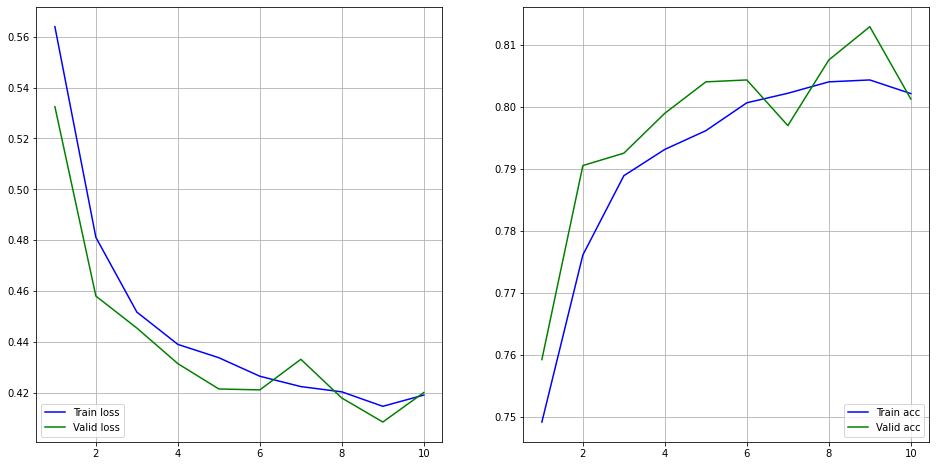

In [ ]:
plot_train_valid_history(history)

In [ ]:
score, acc = model.evaluate(x_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

204/204 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8015
Test score: 0.42011263966560364
Test accuracy: 0.8014739751815796


## Task 1
Create, train and test a model with following parameters:
- First hidden layer: 32 neurons, relu activation
- Dropout after first hidden layer keep_probability = 0.5
- Second hidden layer: 32 neurons, relu activation
- Output layer: 1 neuron, sigmoid activation

Training parameters:
- Learning Rate: 0.0003
- Number of Epochs: 50
- Batch size: 128

*Note: You will need your model in task 2, so it is a good idea to write a function, which creates the model.*

![alt text](./img/model_keras_task1.png "Task 1 model")

In [ ]:
# HYPERPARAMETERS
CELLS_1 = 32
CELLS_2 = 32

LEARNING_RATE = 0.0003
EPOCHS = 50
BATCH_SIZE = 128

NR_INPUTS = x_train.shape[1]

print(f"x_train dataset contains {NR_INPUTS} features (columns).")


x_train dataset contains 23 features (columns).


In [ ]:
def create_model():
    model = Sequential()
    
    #dodawanie warstw
    model.add(Dense(CELLS_1, input_shape = [NR_INPUTS, ], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(CELLS_2, activation='relu'))
    #warstwa wyjściowa
    model.add(Dense(1,activation='sigmoid'))

    optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [ ]:
model1 = create_model()
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                768       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ENTER YOUR CODE HERE
history = model1.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

Epoch 1/50
153/153 [==============================] - 0s 3ms/step - loss: 2.5195 - accuracy: 0.6296 - val_loss: 0.7346 - val_accuracy: 0.7592
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 1.1336 - accuracy: 0.6458 - val_loss: 0.5663 - val_accuracy: 0.7592
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.7984 - accuracy: 0.6726 - val_loss: 0.5706 - val_accuracy: 0.7592
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.6934 - val_loss: 0.5680 - val_accuracy: 0.7592
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.7064 - val_loss: 0.5537 - val_accuracy: 0.7592
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.7215 - val_loss: 0.5496 - val_accuracy: 0.7592
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.7338 - val_loss: 0.5403 - val_accuracy: 0.7592
Epoch 

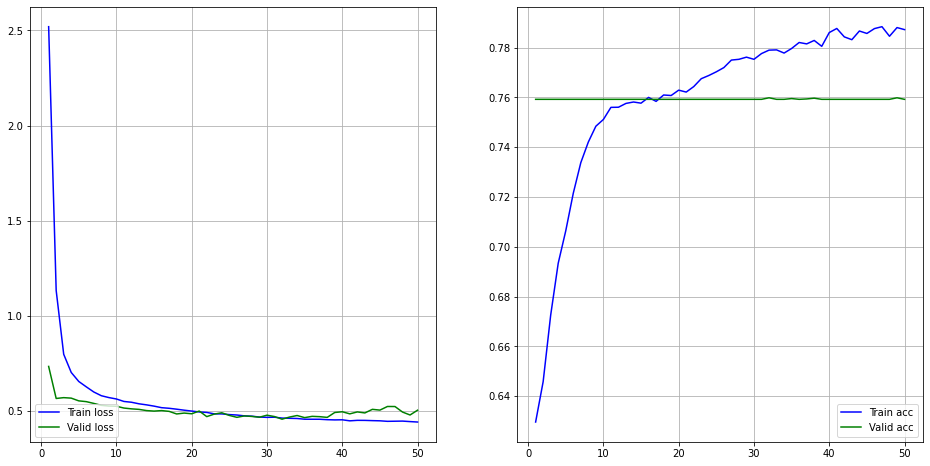

In [ ]:
plot_train_valid_history(history)

In [ ]:
score, acc = model1.evaluate(x_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

204/204 [==============================] - 0s 848us/step - loss: 0.5048 - accuracy: 0.7591
Test score: 0.5048331618309021
Test accuracy: 0.7590972185134888


## Question 1
- How does the model behave. Can you see any overfitting or undergitting problems?
- How you can prevent these problems?

## Task 2
Normalize your features. Use StandardScaler from sklearn.preprocessing library. Then train your model on the normalized features. Did it change anything with the behaviour of the model?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [ ]:
# HYPERPARAMETERS
CELLS_1 = 32
CELLS_2 = 32

LEARNING_RATE = 0.0003
EPOCHS = 50
BATCH_SIZE = 128

NR_INPUTS = x_train.shape[1]

print(f"x_train dataset contains {NR_INPUTS} features (columns).")

x_train dataset contains 23 features (columns).


In [ ]:
# Create and train the model
model2 = create_model()

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                768       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

Epoch 1/50
153/153 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7204 - val_loss: 0.4749 - val_accuracy: 0.7996
Epoch 2/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7731 - val_loss: 0.4385 - val_accuracy: 0.8104
Epoch 3/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7800 - val_loss: 0.4230 - val_accuracy: 0.8120
Epoch 4/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7802 - val_loss: 0.4175 - val_accuracy: 0.8108
Epoch 5/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.7859 - val_loss: 0.4119 - val_accuracy: 0.8154
Epoch 6/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7922 - val_loss: 0.4085 - val_accuracy: 0.8165
Epoch 7/50
153/153 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7910 - val_loss: 0.4058 - val_accuracy: 0.8173
Epoch 

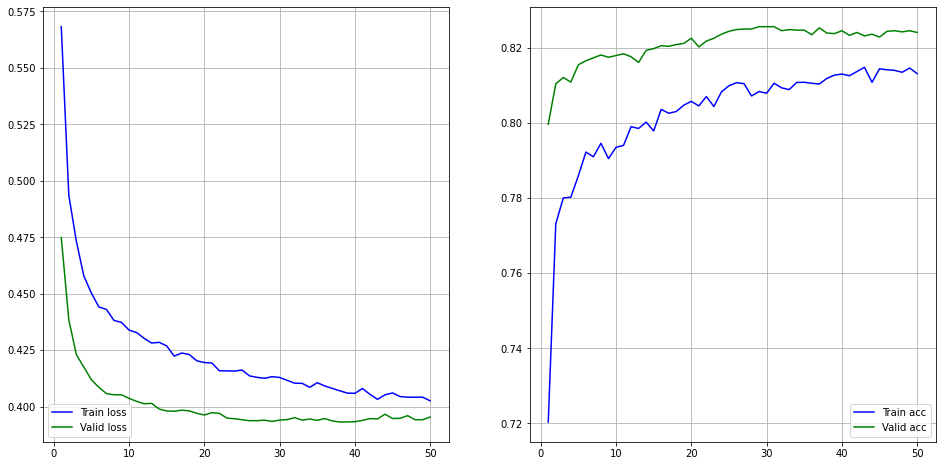

In [ ]:
plot_train_valid_history(history)

In [ ]:
score, acc = model2.evaluate(x_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

204/204 [==============================] - 0s 809us/step - loss: 0.4014 - accuracy: 0.8187
Test score: 0.4014033377170563
Test accuracy: 0.8186703324317932


x_train dataset contains 23 features (columns).
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                768       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
Epoch 1/55
153/153 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6954 - val_loss: 0.4600 - val_accuracy: 0.7756
Epoch 2/55
153/153 [==============================] - 0s 2ms

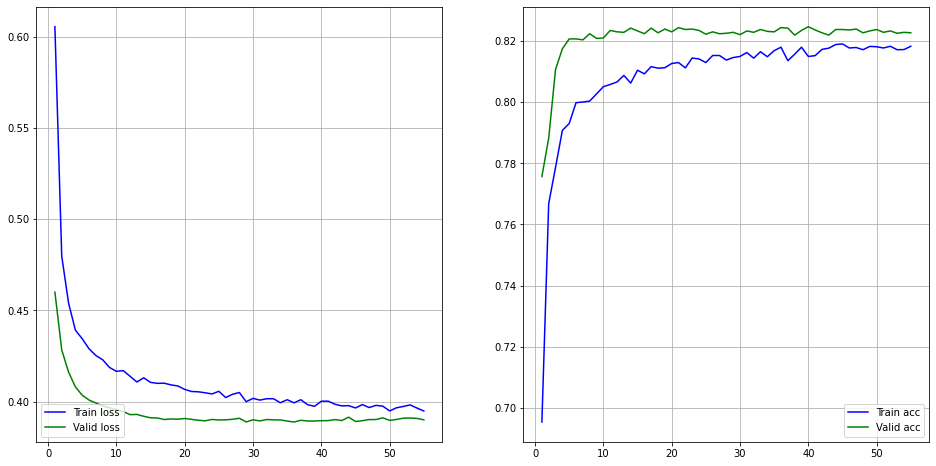

204/204 [==============================] - 0s 933us/step - loss: 0.3963 - accuracy: 0.8191
Test score: 0.3962894380092621
Test accuracy: 0.8191309571266174


In [ ]:
# HYPERPARAMETERS
CELLS_1 = 32
CELLS_2 = 8

LEARNING_RATE = 0.0009
EPOCHS = 55
BATCH_SIZE = 128

NR_INPUTS = x_train.shape[1]

print(f"x_train dataset contains {NR_INPUTS} features (columns).")

model3 = create_model()

model3.summary()

history = model3.fit(x_train, y_train,
                    validation_data = (x_valid, y_valid),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS
                    )

plot_train_valid_history(history)

score, acc = model3.evaluate(x_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)